In [7]:
zff_csv = "data/Zurich Film Festival 2019.csv"

#read content
with open(zff_csv, "r") as zff_file:
    FileContent = zff_file.read()

#read as list
with open(zff_csv, "r") as zff_file:
    FileasList = zff_file.readlines()

print(FileasList[1])

1,tt9801736,2019-09-18,2019-09-18,,"Hvítur, Hvítur Dagur",https://www.imdb.com/title/tt9801736/,movie,7.1,109,2019,Drama,370,2019-05-16,Hlynur Palmason



In [386]:
import pandas as pd 

newdf = pd.DataFrame()
dfx            = pd.read_csv ("data/Zurich Film Festival 2019.csv"
                              , encoding='latin-1'
                              , keep_default_na=False, na_values=[""]
                             )

dfx['dat_per'] = '2019'

#dfx.ix[1,1]
newdf = newdf.append(dfx.filter(['dat_per', 'position', 'const', 'IMDb Rating']))
dfx.head()


,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,dat_per
0,1,tt9801736,2019-09-18,2019-09-18,NaN,"Hvítur, Hvítur Dagur",https://www.imdb.com/title/tt9801736/,movie,7.1,109.0,2019.0,Drama,370.0,2019-05-16,Hlynur Palmason,2019
1,2,tt8963708,2019-09-18,2019-09-18,NaN,And Then We Danced,https://www.imdb.com/title/tt8963708/,movie,8.4,105.0,2019.0,"Drama, Romance",1193.0,2019-05-16,Levan Akin,2019
2,3,tt8399664,2019-09-18,2019-09-18,NaN,Babyteeth,https://www.imdb.com/title/tt8399664/,movie,7.0,120.0,2019.0,"Comedy, Drama",174.0,2019-09-04,Shannon Murphy,2019
3,4,tt8311958,2019-09-18,2019-09-18,NaN,Divino Amor,https://www.imdb.com/title/tt8311958/,movie,6.5,101.0,2019.0,"Drama, Sci-Fi",749.0,2019-01-25,Gabriel Mascaro,2019
4,5,tt9806192,2019-09-18,2019-09-18,NaN,J'ai perdu mon corps,https://www.imdb.com/title/tt9806192/,movie,7.6,81.0,2019.0,"Animation, Drama",216.0,2019-05-17,Jérémy Clapin,2019


In [389]:
import pandas as pd 

newdf = pd.DataFrame()

for i in range(2015,2019+1):

#   dfx            = pd.read_csv ("data/Zurich Film Festival 2019.csv", encoding='latin-1')
    dfx            = pd.read_csv (("data/Zurich Film Festival " + str(i) + ".csv"), encoding='latin-1')
    
    dfx['dat_per'] = i                                  #add column
    newdf          = newdf.append(dfx)                  #add all rouws
    print(i)
    
newdf.head()


2015
2016
2017
2018
2019


,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,dat_per
0,1,tt3473410,2015-09-12,2015-09-12,NaN,Bob and the Trees,https://www.imdb.com/title/tt3473410/,movie,6.5,91.0,2015.0,Drama,144.0,2015-01-26,Diego Ongaro,2015
1,2,tt4899406,2015-09-12,2015-09-12,NaN,Boi Neon,https://www.imdb.com/title/tt4899406/,movie,6.8,101.0,2015.0,Drama,2384.0,2015-09-04,Gabriel Mascaro,2015
2,3,tt2818252,2015-09-12,2015-09-12,NaN,Couple in a Hole,https://www.imdb.com/title/tt2818252/,movie,5.5,105.0,2015.0,"Drama, Thriller",554.0,2015-09-15,Tom Geens,2015
3,4,tt3777384,2015-09-12,2015-09-12,NaN,Eva Nová,https://www.imdb.com/title/tt3777384/,movie,7.1,106.0,2015.0,Drama,288.0,2015-09-11,Marko Skop,2015
4,5,tt3296658,2015-09-12,2015-09-12,NaN,Hrútar,https://www.imdb.com/title/tt3296658/,movie,7.3,93.0,2015.0,Drama,11270.0,2015-05-28,Grímur Hákonarson,2015


In [66]:
import numpy as np 
import matplotlib.pyplot as plt
a = np.array([newdf.dat_per,1])
a.shape


(2,)

In [390]:
from datetime import datetime
import pandas as pd 
# with open('/data/Example2.txt', 'w') as testwritefile:
   # testwritefile.write(str(newdf))
  
newdf.to_csv('out/zff_over_time.csv'
             , sep=';'
             , encoding='utf-8'
             , index=False)

# write output 
newdf.to_csv('out/zff_total_' + datetime.now().strftime('%Y%m%d%H%M%S') + '.csv'
             , sep=';'
             , encoding='utf-8'
             , index=False)    
newdf.shape  

(738, 16)

In [454]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    
    for s in liste: 
        keyword_count[s] = 0
        
    for liste_keywords in df[ref_col].str.split(','):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
            
        for s in liste_keywords: 

             if pd.notnull(s):  keyword_count[s] = keyword_count[s] +1    
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    
    keyword_occurences = []
    
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

In [464]:
#clean white spaces
newdf['Genres']       = newdf['Genres'].str.replace(" ","")

set_keywords = set()

for liste_keywords in newdf['Genres'].str.split(',').values:    
    if type(liste_keywords) == float: continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

#keyword_occurences, dum = count_word(newdf, 'Genres', set_keywords)
dum = count_word(newdf, 'Genres', set_keywords)
keyword_occurences[:7]    



[['Drama', 511],
 ['Documentary', 164],
 ['Comedy', 139],
 ['Thriller', 102],
 ['Romance', 91],
 ['Biography', 86],
 ['Crime', 78]]

In [186]:

mylist = ['nowplaying', 'PBS', 'PBS', 'nowplaying', 'job', 'debate', 'thenandnow']
myset = set(mylist)
print(myset)


mylist = list(newdf.Directors)
#mylist = list(a.str.split(',').values)
#myset = set(mylist) 
#print(mylist)
#mylist.count(['Drama'])

a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
d = {x:mylist.count(x) for x in mylist}
d

import collections
a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
print(counter)

counter=collections.Counter(mylist)
print(counter)



newdf['dat_per'].drop_duplicates().values.tolist()
set(newdf['Genres'].drop_duplicates().values.tolist())



{'PBS', 'nowplaying', 'job', 'thenandnow', 'debate'}
Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
Counter({nan: 29, 'Mike Leigh': 13, 'Olivier Assayas': 13, 'Roland Emmerich': 9, 'Rob Reiner': 8, 'Niklaus Hilber': 3, 'Todd Haynes': 3, 'Stephen Frears': 3, 'Jim Jarmusch': 3, 'Federico Veiroj': 3, 'Pablo Larraín': 3, 'Barry Levinson': 3, 'Kurt Früh': 3, 'Christoph Schaub': 3, 'Michael Steiner': 3, 'Hirokazu Koreeda': 3, 'Gabriel Mascaro': 2, 'Jonas Carpignano': 2, 'Alex Winter': 2, 'Marie Kreutzer': 2, 'Andrew Haigh': 2, 'Alex Gibney': 2, 'Frederick Wiseman': 2, 'Léa Pool': 2, 'Noah Baumbach': 2, 'Denis Villeneuve': 2, 'Matthew Heineman': 2, 'Herman Yau': 2, 'Céline Sciamma': 2, 'David Fincher': 2, 'Cihan Inan': 2, 'Daniel Schmid': 2, 'Michel Franco': 2, 'Leopold Lindtberg': 2, 'Rolf Lyssy': 2, 'Damien Chazelle': 2, 'Garth Davis': 2, 'Oliver Stone': 2, 'Olivier Nakache, Éric Toledano': 2, 'László Nemes': 2, 'Yorgos Lanthimos': 2, 'Claire Denis': 2, 'Dieudo Hamadi': 2, 'Laura Mora Ortega': 2, 

In [289]:
import numpy as np 
a= newdf['Genres'].str.replace(" ","")  #remove leading blanks and others

set_keywords = a.str.split(',').values

for i in range(0,3):
#    newdf['Genres'].drop_duplicates().values.tolist()
     a.iloc[[i]]
     i= i+1
        
a.str.split(",").iloc[[2]]

2    [Drama, Thriller]
Name: Genres, dtype: object

In [426]:
a            = newdf['Genres'].str.replace(" ","") 

vertical_stack   = pd.DataFrame()
horizontal_stack = pd.DataFrame()

for i in range (0,6):
      for genre  in a.iloc[[i]].str.split(','):
            
                 lst  = newdf.iloc[[i]]['Title']
                 lst2 = newdf.iloc[[i]]['Genres'].str.replace(" ","")  
                 #lst2 = genre

                 df = pd.DataFrame(
                                    list(zip(lst, lst2))
                                   , columns =['Name', 'value']
                                  ) 

                 # Stack the DataFrames on top of each other
                 vertical_stack = pd.concat([vertical_stack, df], axis=0)

                 # Place the DataFrames side by side
                 horizontal_stack = pd.concat([horizontal_stack, df], axis=1)

                 print(i, genre)  
                 
      i = i+1
vertical_stack
 

0 ['Drama']
1 ['Drama']
2 ['Drama', 'Thriller']
3 ['Drama']
4 ['Drama']
5 ['Crime', 'Drama', 'War']


,Name,value
0,Bob and the Trees,Drama
0,Boi Neon,Drama
0,Couple in a Hole,"Drama,Thriller"
0,Eva Nová,Drama
0,Hrútar,Drama
0,Krigen,"Crime,Drama,War"


In [436]:
a            = newdf['Genres'].str.replace(" ","")  

# iterate over all the elements 
for item in a.iloc[[2]].str.split(',').iteritems()    : 
    print(item[1]) 
    



['Drama', 'Thriller']


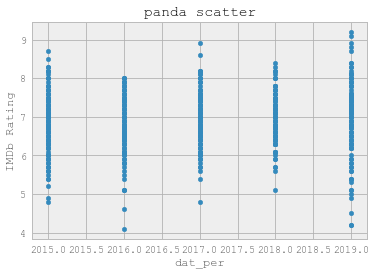

In [245]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii



newdf.plot.scatter(x='dat_per', y='IMDb Rating', title='panda scatter')
plt.show()

         Position  Description  IMDb Rating  Runtime (mins)         Year  \
count  738.000000          0.0   727.000000      724.000000   737.000000   
mean    75.333333          NaN     6.902338      101.984807  2013.815468   
std     44.215367          NaN     0.744628       25.636485     9.788310   
min      1.000000          NaN     4.100000       18.000000  1935.000000   
25%     37.250000          NaN     6.500000       90.000000  2015.000000   
50%     74.000000          NaN     6.900000       99.000000  2016.000000   
75%    111.000000          NaN     7.400000      113.000000  2018.000000   
max    165.000000          NaN     9.200000      334.000000  2019.000000   

          Num Votes      dat_per  
count  7.270000e+02   738.000000  
mean   2.485323e+04  2016.975610  
std    8.304376e+04     1.447199  
min    5.000000e+00  2015.000000  
25%    1.690000e+02  2016.000000  
50%    8.670000e+02  2017.000000  
75%    8.712000e+03  2018.000000  
max    1.154366e+06  2019.000000  


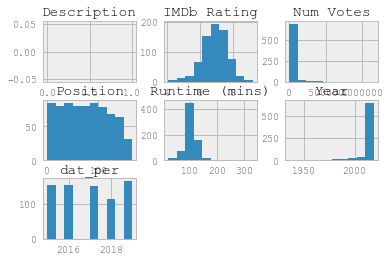

,Position,Description,IMDb Rating,Runtime (mins),Year,Num Votes
dat_per,,,,,,
2015,77.5,NaN,6.824342,100.581699,2012.097403,36701.250000
2016,77.5,NaN,6.783007,99.686275,2011.305195,12484.261438
2017,76.0,NaN,6.945033,101.073826,2013.158940,32435.052980
2018,57.5,NaN,6.926549,103.711712,2017.070175,14951.725664
2019,83.0,NaN,7.034810,105.215190,2016.128049,25268.221519


In [237]:
print(newdf.describe())

newdf.hist()
plt.show()

newdf.groupby('dat_per').mean()

# from pandas.plotting import scatter_matrix
# scatter_matrix(newdf, alpha=0.2, figsize=(6, 6))

In [55]:
newdf.filter(['dat_per','Title', 'Const', 'Directors', 'Release Date', 'Genres', 'Runtme (mins)', 'IMDb Rating', ])

,dat_per,Title,Const,Directors,Release Date,Genres,IMDb Rating
0,2015,Bob and the Trees,tt3473410,Diego Ongaro,2015-01-26,Drama,6.5
1,2015,Boi Neon,tt4899406,Gabriel Mascaro,2015-09-04,Drama,6.8
2,2015,Couple in a Hole,tt2818252,Tom Geens,2015-09-15,"Drama, Thriller",5.5
3,2015,Eva Nová,tt3777384,Marko Skop,2015-09-11,Drama,7.1
4,2015,Hrútar,tt3296658,Grímur Hákonarson,2015-05-28,Drama,7.3
5,2015,Krigen,tt3830162,Tobias Lindholm,2015-09-05,"Crime, Drama, War",7.1
6,2015,Las elegidas,tt4636042,David Pablos,2015-05-18,Drama,6.7
7,2015,Mediterranea,tt3486542,Jonas Carpignano,2015-05-19,Drama,6.5
8,2015,Miracolul din Tekir,tt4473938,Ruxandra Zenide,2015-09-26,"Drama, Mystery",6.8
9,2015,Nichts passiert,tt4073868,Micha Lewinsky,2015-09-26,"Comedy, Crime, Drama",6.7


In [18]:
from datetime import datetime
import gzip
import pandas as pd 

#https://bit.ly/2NyxdAG
from bs4 import BeautifulSoup
import requests
import re

# Download IMDB's Top 250 data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

newdf = pd.DataFrame()
imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    position = movie[:len(str(index))-(len(movie))]
    data = {"index": index,
            "position": position,
            "tcont": links[index][7:16],
            "movie_title": movie_title,
            "year": year,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "url": 'https://www.imdb.com/title/'+links[index][7:16],
            "dat_per": datetime.now().strftime('%Y%m%d')
             }
    imdb.append(data)
 
    df = pd.DataFrame(data, [0])
    newdf = newdf.append(df)
    
# write output 
newdf.to_csv('top250out'+datetime.now().strftime('%Y%m%d%H%M%S')+'.csv'
             , sep=';'
             , encoding='utf-8'
             , index=False)    

In [34]:
url = 'https://www.imdb.com/list/ls021169430'
response = requests.get(url)
print(response.text[:500])
print(soup.select('td.lister-item-header'))







<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls021169430?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      ue
[]


In [35]:
#name.basics.tsv.gz (tsv)
dfx=pd.read_csv ('data/IMDbTop250_2006.csv' )
print(dfx.head()) #no of  

   position      const                   created                  modified  \
0         1  tt0068646  Mon Apr  7 15:44:15 2014  Mon Apr  7 15:44:15 2014   
1         2  tt0111161  Mon Apr  7 15:44:15 2014  Mon Apr  7 15:44:15 2014   
2         3  tt0071562  Mon Apr  7 15:44:16 2014  Mon Apr  7 15:44:16 2014   
3         4  tt0167260  Mon Apr  7 15:44:16 2014  Mon Apr  7 15:44:16 2014   
4         5  tt0060196  Mon Apr  7 15:44:16 2014  Mon Apr  7 15:44:16 2014   

   description                                          Title    Title type  \
0          NaN                                  The Godfather  Feature Film   
1          NaN                       The Shawshank Redemption  Feature Film   
2          NaN                         The Godfather: Part II  Feature Film   
3          NaN  The Lord of the Rings: The Return of the King  Feature Film   
4          NaN                 The Good, the Bad and the Ugly  Feature Film   

              Directors  IMDb Rating  Runtime (mins)  Ye

In [ ]:
soup.select('td.titleColumn')